# Cognitive Science and AI
### Assignment 2: Brain encoding and decoding with Nilearn

**Kshitijaa Jaglan** \
2019115005

**Importing the dataset**

In [1]:
from nilearn import datasets, image, plotting, masking
import matplotlib.pyplot as plt
import numpy as np

haxby_dataset = datasets.fetch_haxby(data_dir=None, fetch_stimuli=True)

### Q1. What is the repetition time (TR) in seconds?

In [2]:
t_r = 2.5 # in seconds

Source: *Haxby, James V. et al. (2001). “Distributed and Overlapping Representations of Faces and Objects in Ventral Temporal Cortex”. In: Science 293.5539, pp. 2425–2430.*

In [3]:
# loading the functional image
functional = image.load_img(img=haxby_dataset["func"])
type(functional)

nibabel.nifti1.Nifti1Image

In [4]:
functional.shape

(40, 64, 64, 1452)

### Q2.1. How many brain volumes are acquired in time?

As seen from `functional.shape` above, there are **1452** volumes acquired over time

### Q2.2. Pick any voxel within the brain and plot a time-course of one voxel or few voxels using Python library matplotlib

/Users/kshitijaa/.local/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


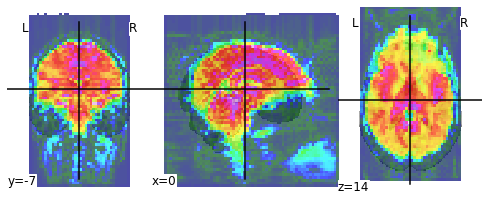

In [5]:
func_mean = image.mean_img(functional)
display = plotting.plot_roi(func_mean)


In [6]:
mask_img = masking.compute_epi_mask(functional)
masked_data = masking.apply_mask(functional, mask_img)

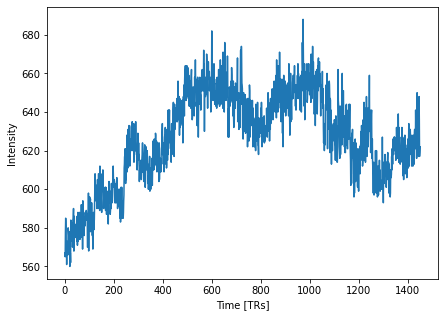

In [7]:
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:, 1:2])
plt.xlabel('Time [TRs]')
plt.ylabel('Intensity')

plt.show()

### Q3. What is the voxel resolution/dimension of the functional image? Is it isotropic or anisotropic?

In [8]:
print(functional.affine)

[[  -3.5      0.       0.      68.25 ]
 [   0.       3.75     0.    -118.125]
 [   0.       0.       3.75  -118.125]
 [   0.       0.       0.       1.   ]]


It is anisotropic

_Loading the session/experimental conditions file represented as "session_target" using Pandas?_

In [9]:
import pandas as pd
behavioral = pd.read_csv(haxby_dataset.session_target[0], delimiter=' ')

In [10]:
behavioral

labels  chunks
0      rest       0
1      rest       0
2      rest       0
3      rest       0
4      rest       0
...     ...     ...
1447   rest      11
1448   rest      11
1449   rest      11
1450   rest      11
1451   rest      11

[1452 rows x 2 columns]

In [11]:
behavioral['labels'].unique()

array(['rest', 'scissors', 'face', 'cat', 'shoe', 'house', 'scrambledpix',
       'bottle', 'chair'], dtype=object)

### Q4.1 List out the categories that are used in the experiments for visual object recognition task?

As seen above, the categories are: 'rest', 'scissors', 'face', 'cat', 'shoe', 'house', 'scrambledpix', 'bottle', and 'chair'

In [12]:
stimulus = haxby_dataset.stimuli

### Q4.2 Plot one image from any of the two categories

**Plotting for the category face**

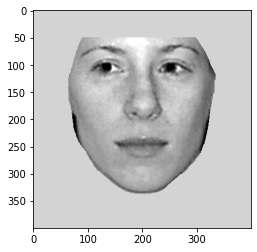

In [13]:
plt.imshow(plt.imread(stimulus['faces'][0]), cmap=plt.cm.gray)

**Plotting for the category cat**

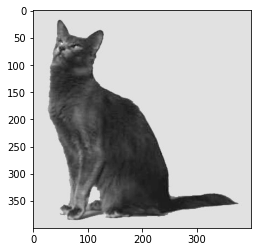

In [14]:
plt.imshow(plt.imread(stimulus['cats'][0]), cmap=plt.cm.gray)

### Q5 For how many runs/sessions are the experiments repeated? The information is provided with column name "chunks" after loading the .txt file attributed to "session_target".

In [15]:
behavioral["chunks"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

12 runs/sessions as the numbers go from 0 to 11

## NiftiMasker using ROIs as brain masks on fMRI image

In [16]:
from nilearn.input_data import NiftiMasker

/Users/kshitijaa/.local/lib/python3.7/site-packages/nilearn/input_data/__init__.py:27: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


### ROI for mask_vt

In [17]:
mask_vt = image.load_img(img=haxby_dataset['mask_vt'])

**Without filtering**

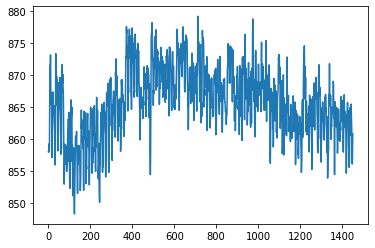

In [18]:
masker_vt = NiftiMasker(mask_img=mask_vt, mask_strategy='epi')
masked_functional_image_vt = masker_vt.fit_transform(functional)

plt.plot(masked_functional_image_vt.mean(axis=1))

**With filtering**

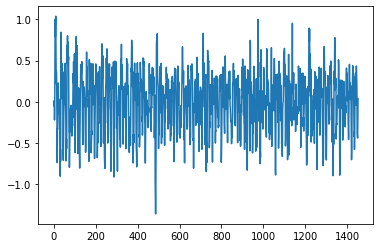

In [19]:
masker_vt_filtered = NiftiMasker(mask_img=mask_vt, high_pass=0.008, standardize=True, detrend=True, t_r=t_r)
masked_functional_image_vt_filtered = masker_vt_filtered.fit_transform(functional)

plt.plot(masked_functional_image_vt_filtered.mean(axis=1))

_**Zooming in to observe the block related/event related design**_

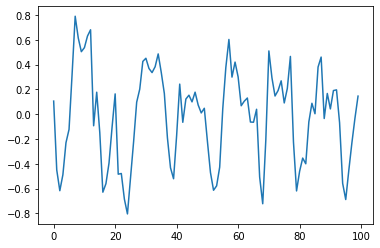

In [20]:
plt.plot(masked_functional_image_vt_filtered.mean(axis=1)[100:200])

### ROI for mask_face

In [21]:
mask_face = image.load_img(img=haxby_dataset['mask_face'])

**Without filtering**

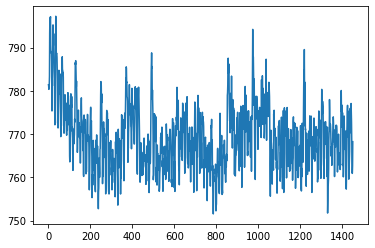

In [22]:
masker_face = NiftiMasker(mask_img=mask_face, mask_strategy='epi')
masked_functional_image_face = masker_face.fit_transform(functional)

plt.plot(masked_functional_image_face.mean(axis=1))

**With filtering**

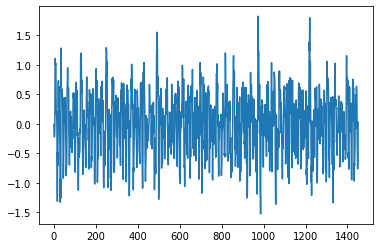

In [23]:
masker_face_filtered = NiftiMasker(mask_img=mask_face, high_pass=0.008, standardize=True, detrend=True, t_r=t_r)
masked_functional_image_face_filtered = masker_face_filtered.fit_transform(functional)

plt.plot(masked_functional_image_face_filtered.mean(axis=1))

_**Zooming in to observe the block related/event related design**_

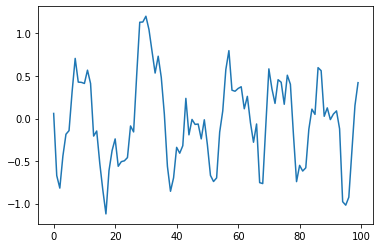

In [24]:
plt.plot(masked_functional_image_face_filtered.mean(axis=1)[100:200])

### ROI for mask_house

In [25]:
mask_house = image.load_img(img=haxby_dataset['mask_house'])

**Without filtering**

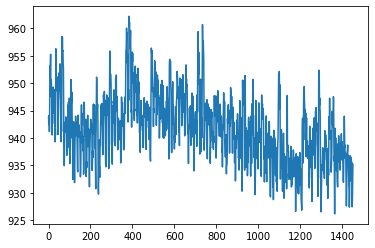

In [26]:
masker_house = NiftiMasker(mask_img=mask_house, mask_strategy='epi')
masked_functional_image_house = masker_house.fit_transform(functional)

plt.plot(masked_functional_image_house.mean(axis=1))

**With filtering**

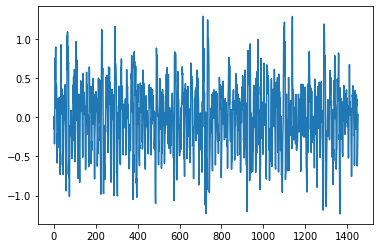

In [27]:
masker_house_filtered = NiftiMasker(mask_img=mask_house, high_pass=0.008, standardize=True, detrend=True, t_r=t_r)
masked_functional_image_house_filtered = masker_house_filtered.fit_transform(functional)

plt.plot(masked_functional_image_house_filtered.mean(axis=1))

_**Zooming in to observe the block related/event related design**_

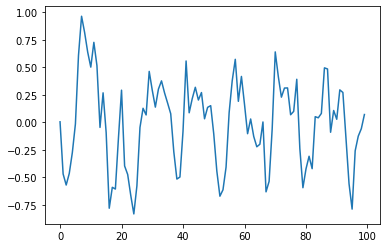

In [28]:
plt.plot(masked_functional_image_house_filtered.mean(axis=1)[100:200])

_**Plotting average signals from the masks used above:**_ \
(with zooming)

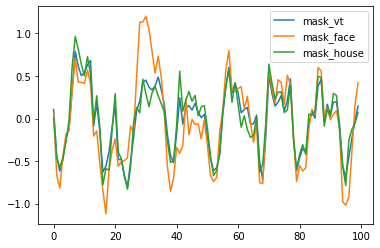

In [29]:
plt.plot(masked_functional_image_vt_filtered.mean(axis=1)[100:200], label='mask_vt')
plt.plot(masked_functional_image_face_filtered.mean(axis=1)[100:200], label='mask_face')
plt.plot(masked_functional_image_house_filtered.mean(axis=1)[100:200], label='mask_house')

plt.legend()

In [30]:
print("vt: ", np.amax(masked_functional_image_vt_filtered.mean(axis=1)))
print("face: ", np.amax(masked_functional_image_face_filtered.mean(axis=1)))
print("house: ", np.amax(masked_functional_image_house_filtered.mean(axis=1)))

vt:  1.0378418
face:  1.8262267
house:  1.2859242


### Q6. After plotting the average signals from each of those masks:

- **Do the signals appear like a block design or event related design?** \
Event related design
- **From the raw tieseries signals, can you see which stimulus evoked a larger response? Is it vt or face or house?** \
As seen in the code block above, the face stimulus evoked the largest response out of the given three options

### Q7. What are the importance of high pass, standardize, de- trend such parameters in fMRI time series analysis? Can you state their role? What could be influencing the results if such parameters are not specified?

Referring to the documentation, the importance of each of these parameters is specified below:

- **High pass:** "High cutoff frequency in Hertz. If specified, signals below this frequency will be filtered out" \
If this parameter is not specified, noise of low frequencies will not be filtered out and can influence the results

- **Standardise:** For the value 'True' used: "The signal is z-scored (same as option zscore). Timeseries are shifted to zero mean and scaled to unit variance." \
This parameter is primarily useful to standardise the signal to help in analysis from origin (instead of some other value at a different location) and if specified as 'psc', to also scale to percent signal change. Moreover, it helps compare and contrast easily when one is dealing with signals of different means (which is very likely)

- **Detrend:** Detrending involves removal of trend effects to leave only the differences in the values from the trend. This is primarily useful to ignore any trends which are going on in the background and focus at main data to analyse

(_Reference: https://nilearn.github.io/modules/generated/nilearn.signal.clean.html#nilearn.signal.clean)_ \

## Estimate brain response maps using GLM with Nilearn.


In [31]:
conditions = behavioral['labels']
sessions = behavioral['chunks']

unique_sessions = sessions.unique()

## Build events

In [32]:
# First session analysis specified as 0

import numpy as np

session = 0

conditions_session = conditions[sessions == session]

n_scans = len(conditions_session)
frame_times = t_r * np.arange(n_scans)

duration = t_r * np.ones(n_scans)

events = pd.DataFrame(
    {'onset': frame_times,
     'trial_type': conditions_session,
     'duration': duration})

In [33]:
print(events)

     onset trial_type  duration
0      0.0       rest       2.5
1      2.5       rest       2.5
2      5.0       rest       2.5
3      7.5       rest       2.5
4     10.0       rest       2.5
..     ...        ...       ...
116  290.0       rest       2.5
117  292.5       rest       2.5
118  295.0       rest       2.5
119  297.5       rest       2.5
120  300.0       rest       2.5

[121 rows x 3 columns]


In [34]:
conditions.shape

(1452,)

In [35]:
conditions_session.shape

(121,)

### Q8. Observe the difference in the data array shape of conditions and conditions session? What does that mean? You can print the shapes of both arrays and tell us why they are different?

As seen in the codeblocks above, the shape of `conditions` is `(1452, )` and that of `conditions_session` is `(121, )` \
Here, `conditions` points to the running of all sessions, whereas `conditions_session` is that for only the one session specified. This is in accordance with the number of sessions (12) mentioned in [Q5](#Q5-For-how-many-runs/sessions-are-the-experiments-repeated?-The-information-is-provided-with-column-name-%22chunks%22-after-loading-the-.txt-file-attributed-to-%22session_target%22.) as `1452/121 = 12`

**Initialise the GLM model**

In [36]:
from nilearn.glm.first_level import FirstLevelModel

glm = FirstLevelModel(t_r=t_r,
                      mask_img=haxby_dataset.mask,
                      high_pass=0.008,
                      smoothing_fwhm=4.)

### Q9. Why is smoothing necessary? What type of smoothing is implemented in the code?

Smoothing is used to discover the important parts of data by "smoothing" out noise (i.e. minimising it) in the data being analysed. It is used to produce small changes in values and helps in regularisation of the model. Say there is a point which is very high than its adjacent points (perhaps due to noise), smoothing will lower its value and hence help reduce noise in our analysis.

The code in this notebook uses **spatial smoothing**. _(Source: https://nilearn.github.io/modules/generated/nilearn.glm.first_level.FirstLevelModel.html)_

In [37]:
z_maps = []
conditions_label = []
each_session_label = []

from nilearn.image import index_img

fmri_session = index_img(functional, sessions == session)

# fit the glm
glm.fit(fmri_session, events=events)

# statistical maps: one per condition name
conditions_names = ['face', 'scrambledpix', 'scissors', 'shoe',
                    'bottle', 'cat', 'chair', 'house']

for condition_ in conditions_names:
    z_maps.append(glm.compute_contrast(condition_))
    conditions_label.append(condition_)
    each_session_label.append(session)

In [38]:
fmri_session.shape

(40, 64, 64, 121)

### Q10. In the code, what is the role of `nilearn.image.index_img`? Why is it important to apply on functional image?

`nilearn.image.index_img` returns an indexed image generated after indexing a 4D Niimg-like object in the 4th dimension. In the code, this is slicing the 4D image (a subset of the functional image) to get the information from only the session specified.

Other use cases of this also include generating 3D image from a 4D one for further analysis but that is not happening in the code above

### Q11. Dig into the FirstLevelModel and helps us understand what type of regression technique is used to estimate $\beta$ maps? Which software is Nilearn dependent on for that regression technique?

**Linear regression** is being used in the `FirstLevelModel` as outlined in its documentation [here](https://nilearn.github.io/glm/first_level_model.html#fitting-a-first-level-model)

Moreover, the `FirstLevelModel` of nilearn "presents an interface to use the glm implemented in `nistats.regression`" and uses functions from scipy to do so

_(Source: https://github.com/nilearn/nilearn/blob/main/nilearn/glm/first_level/first_level.py)_

## Plotting the output attributes that are saved by the model after glm fit

<AxesSubplot:label='conditions', ylabel='scan number'>

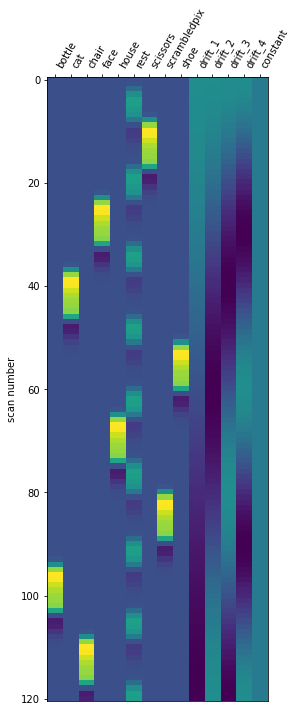

In [39]:
plotting.plot_design_matrix(glm.design_matrices_[0])

### Q12. Plot the design matrices attribute using nilearn.plotting.plot design m What does each column represents? Does this makes sense with GLM design that is shown on Figure 2? Briefly elaborate how it made sense to you?

_The plot can be seen by running the code block above_

Each of the first 9 columns represent the category of the stimulus (bottle, cat, face etc.), followed by the 4 representing the low frequency (drift) signals, and the last column being a constant regressor.

Yes it does make sense as all of the elements present in figure 2 can be mapped to the columns present here. Moreover if we observe the category columns (first 9) carefully, one can see that only one "patch" of it is coloured differently -- indicating the result of product with the Activation Coefficient matrix.

### Q13. What is now the scanning length of fMRI per session?

Scanning length = t_r * (number of repetitions per session)

from the values calculated earlier, the value of `number of repetitions per session` = `121` and that of `t_r` = 2.5 seconds

Therefore, scanning length = `2.5 * 121 seconds` = `302.5 seconds` = `5 minutes 2.5 seconds`

### Q14. What is compute contrast? What it does? Plot the compute constrast outputs for all conditions using `nilearn.plotting.plot` stat map with bg img as Haxby data anatomical image. What is this output type z maps means?


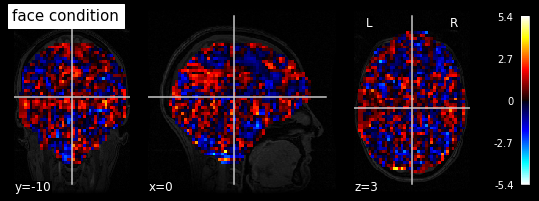

In [40]:
plotting.plot_stat_map(z_maps[0], bg_img=haxby_dataset['anat'][0], title=conditions_names[0] + ' condition')

`compute_contrast` gives us the contrast between beta maps of the states when the given condition (face, house etc.) is active (positive regressor value), versus the remainder. This helps us in finding which areas only have activity when the given condition is is active.

`z_maps` help in normalising the beta values to have a variance of 1

Using the codes from above for all the cases, 

Session:  0


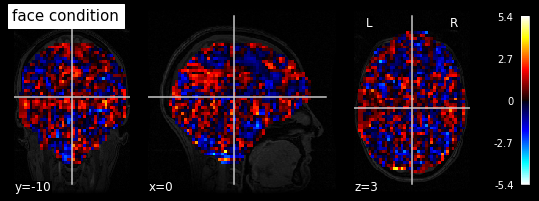

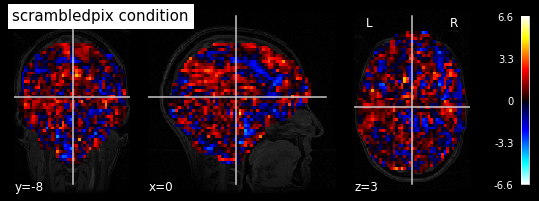

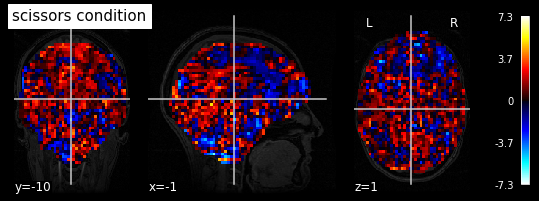

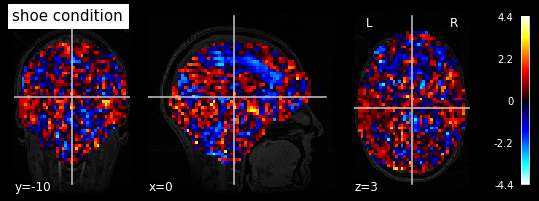

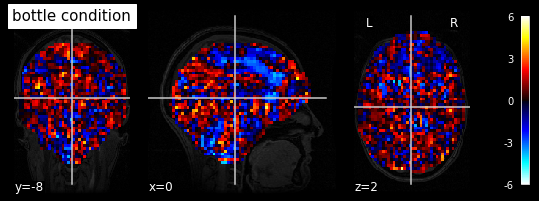

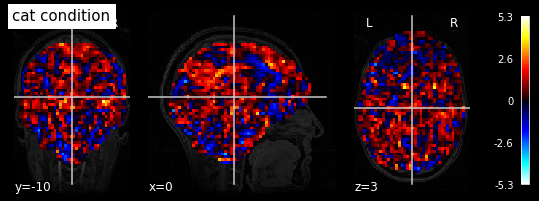

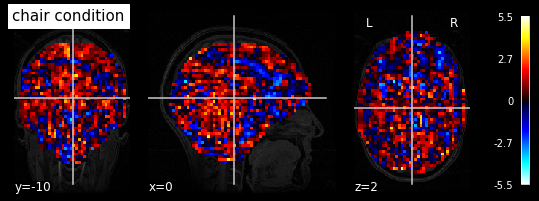

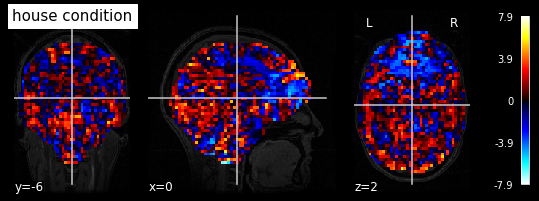

Session:  1


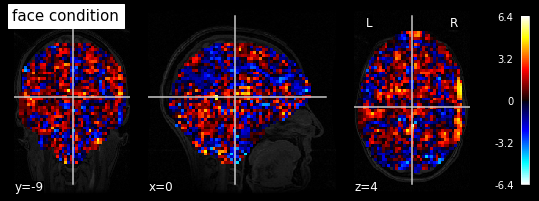

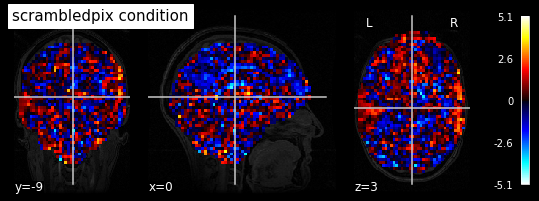

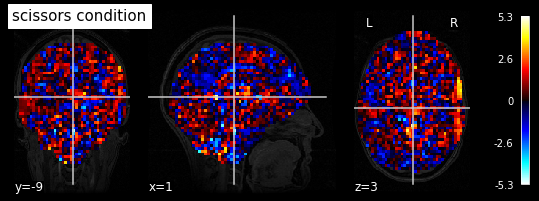

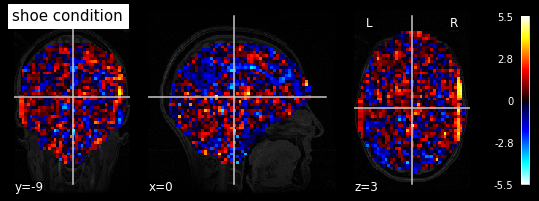

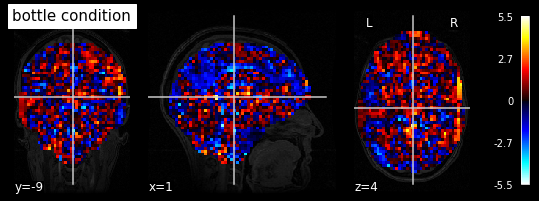

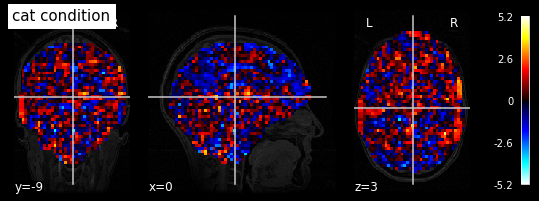

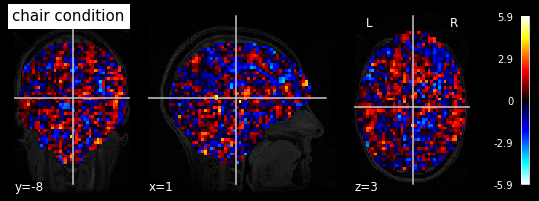

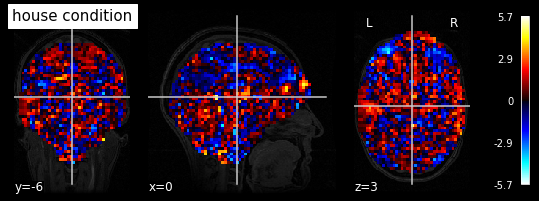

Session:  2


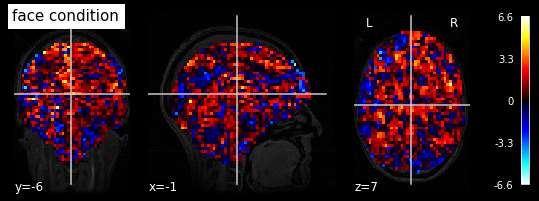

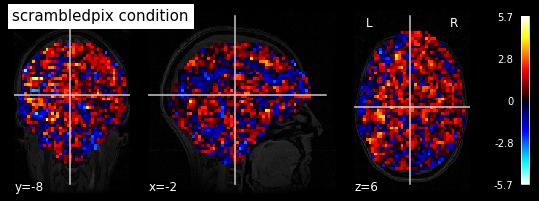

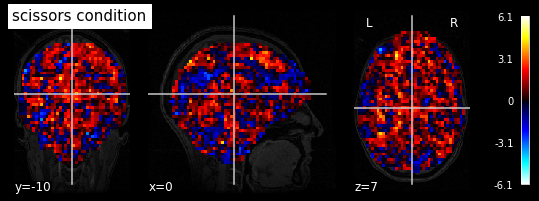

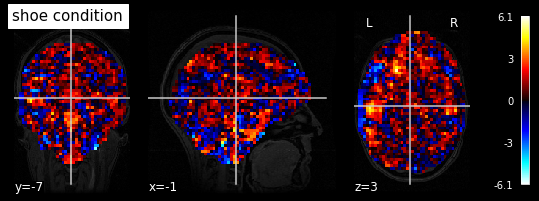

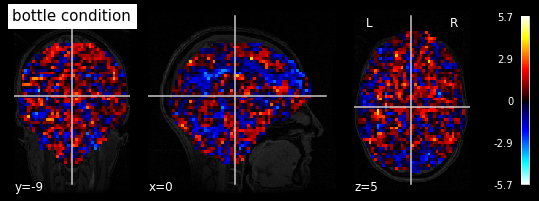

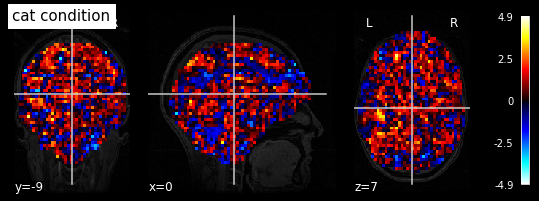

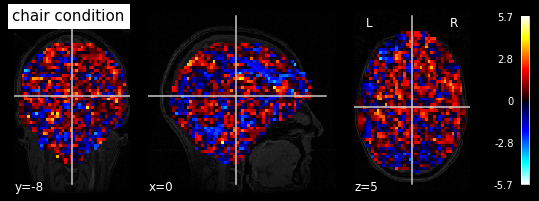

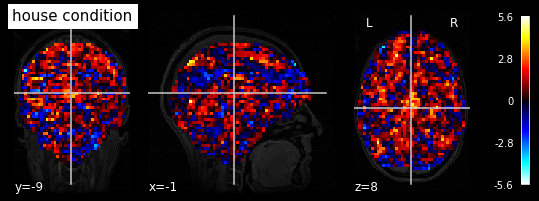

Session:  3


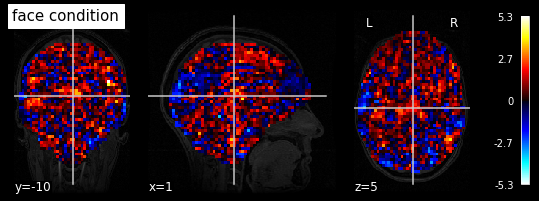

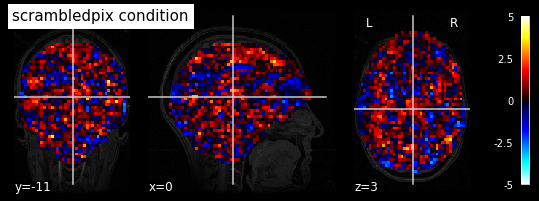

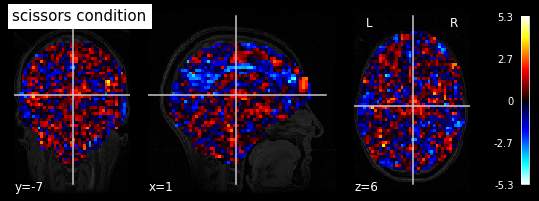

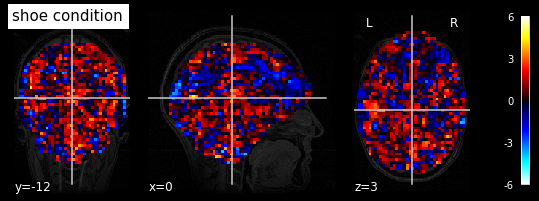

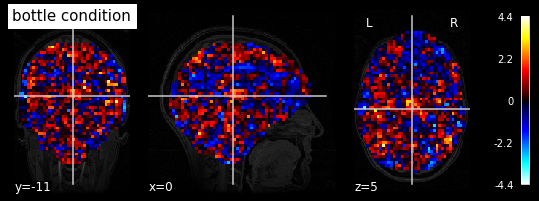

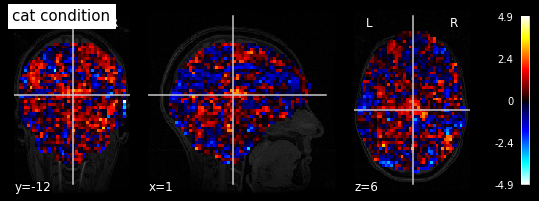

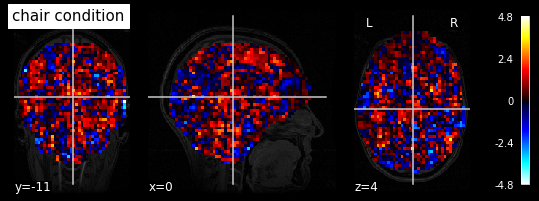

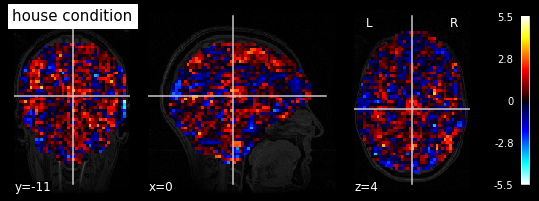

Session:  4


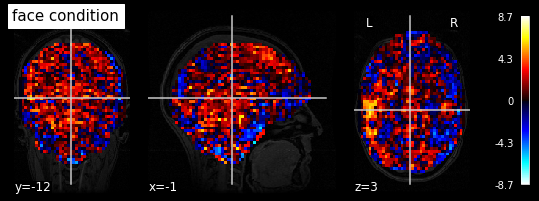

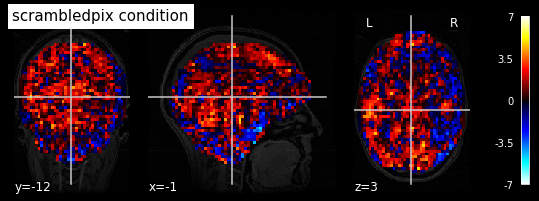

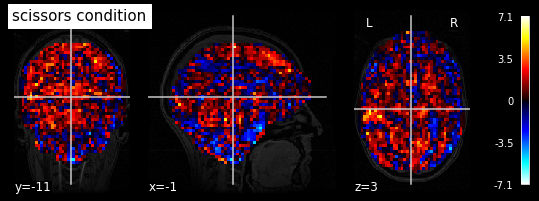

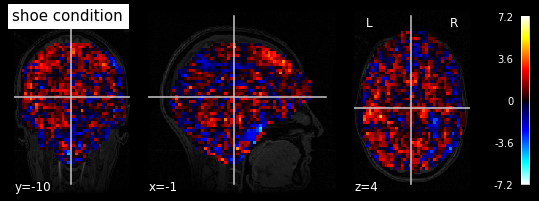

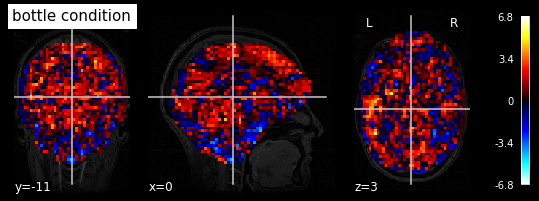

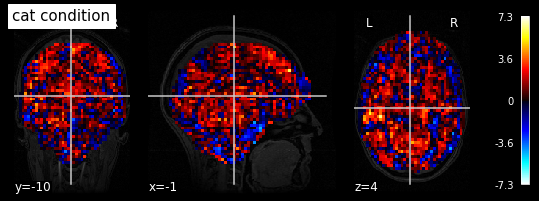

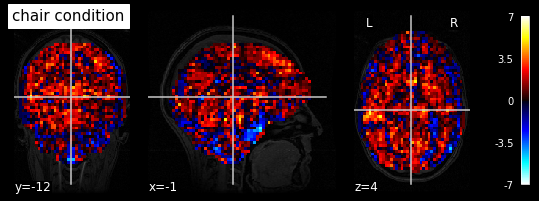

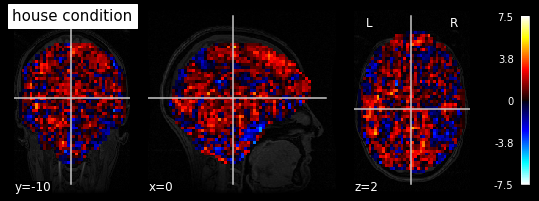

Session:  5


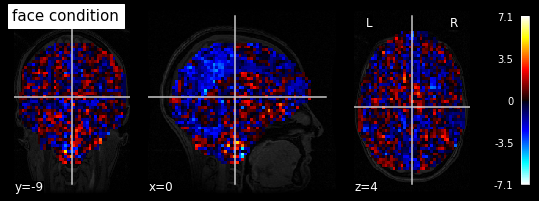

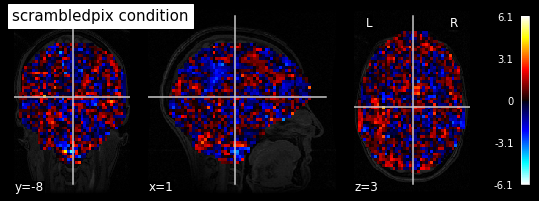

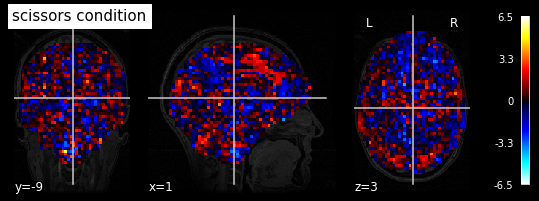

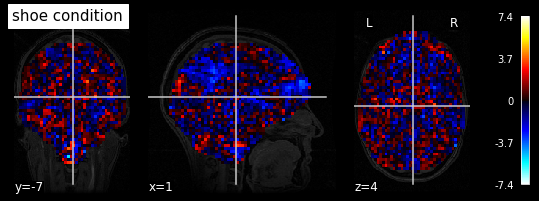

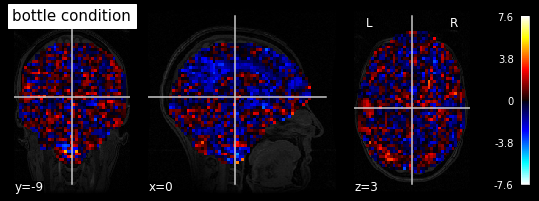

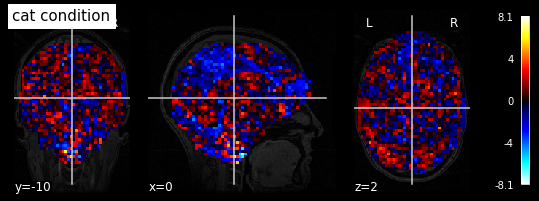

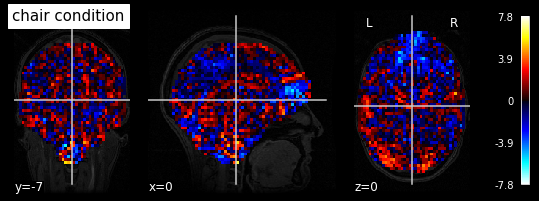

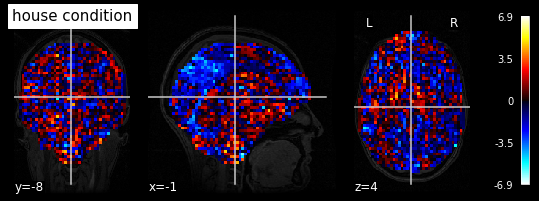

Session:  6


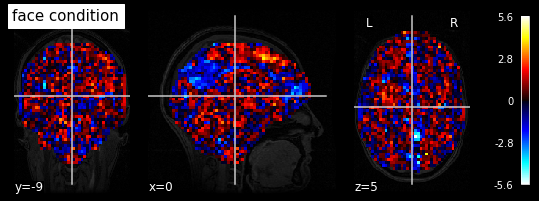

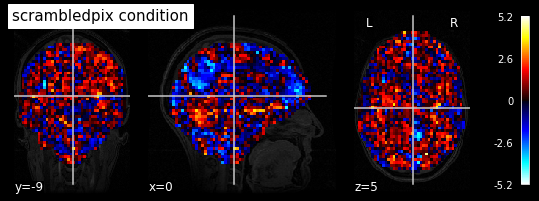

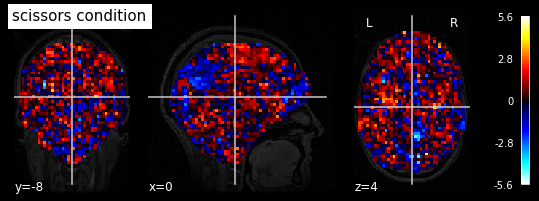

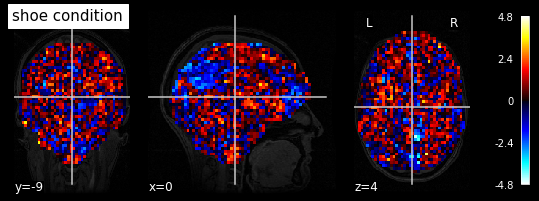

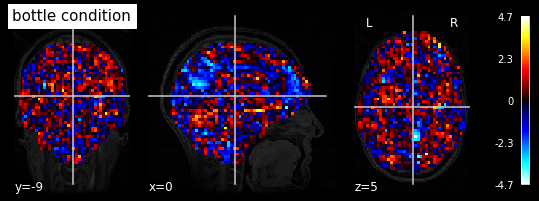

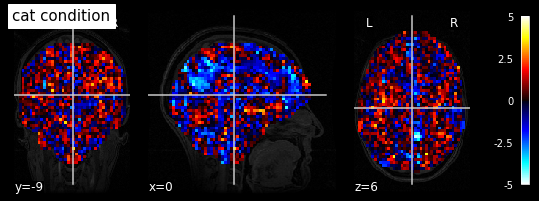

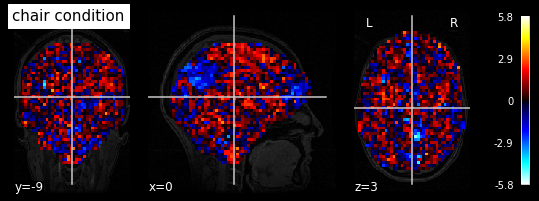

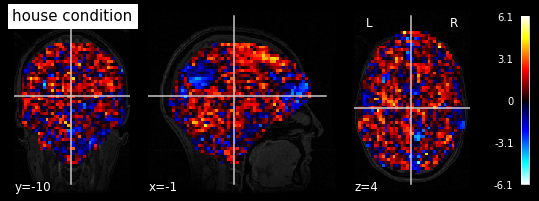

Session:  7


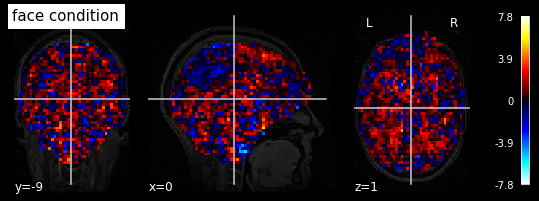

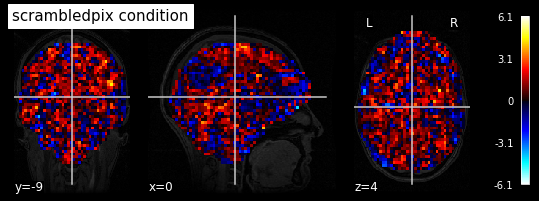

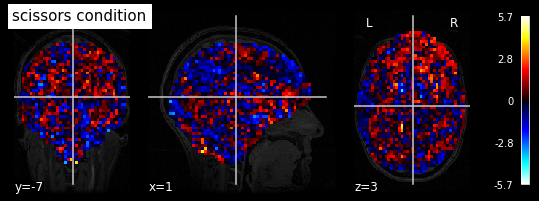

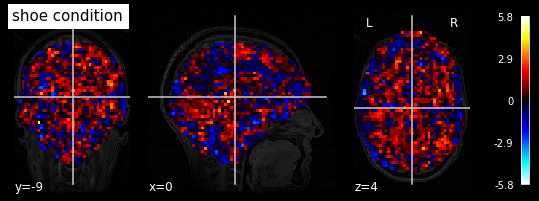

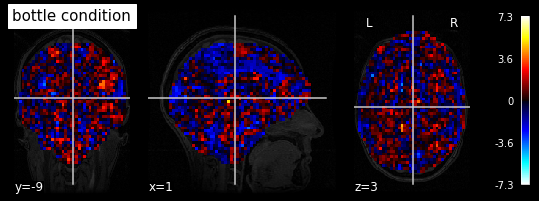

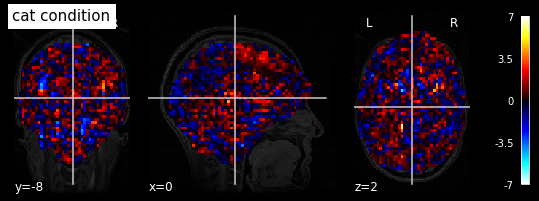

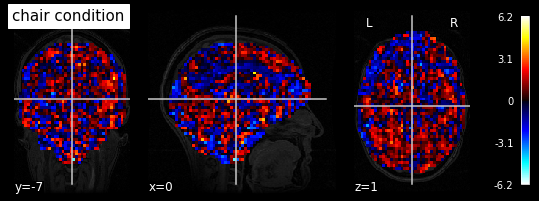

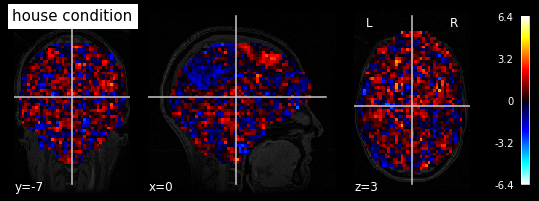

Session:  8


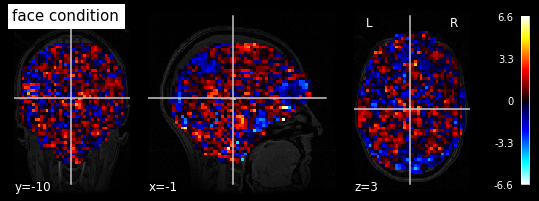

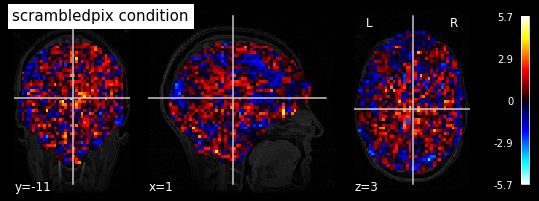

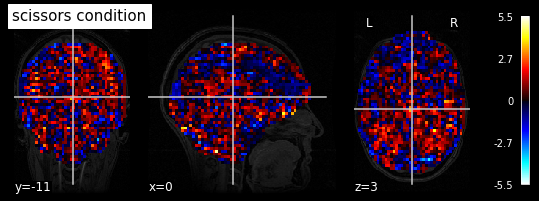

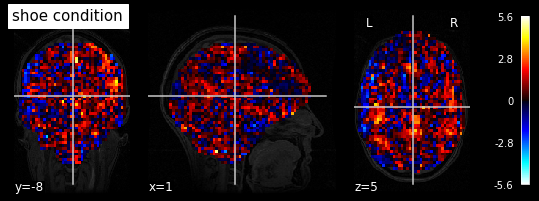

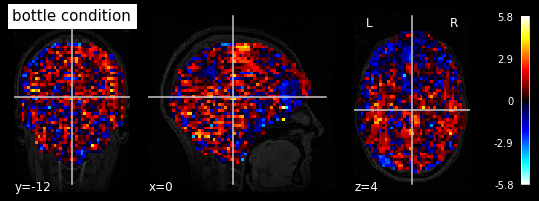

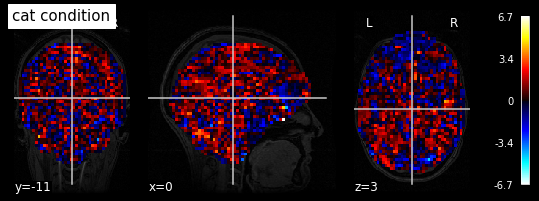

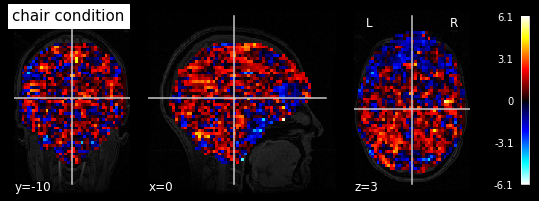

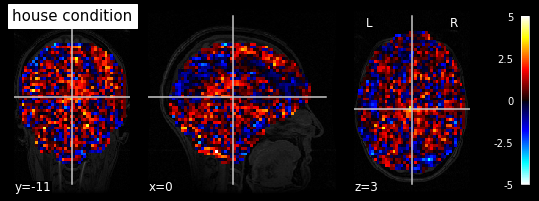

Session:  9


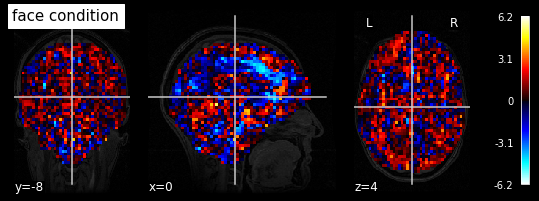

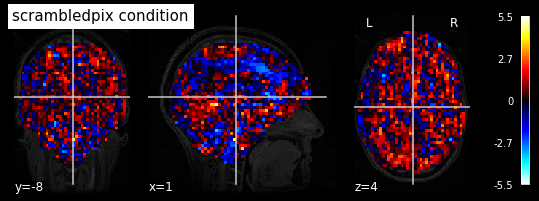

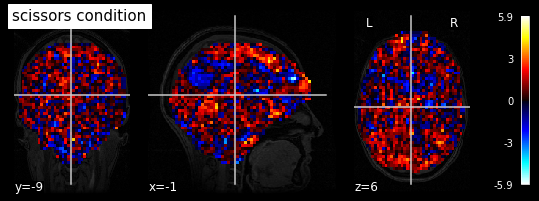

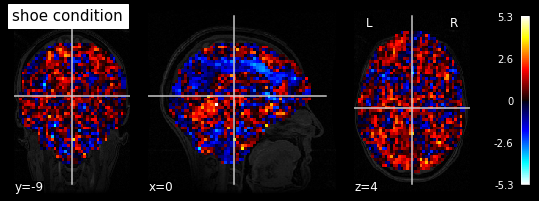

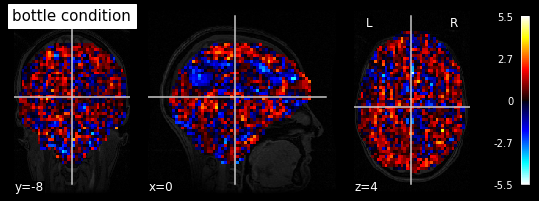

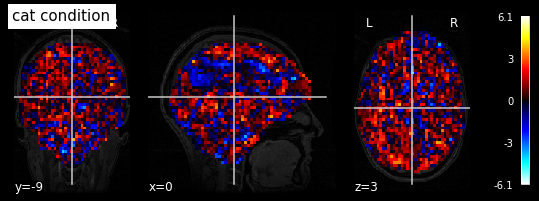

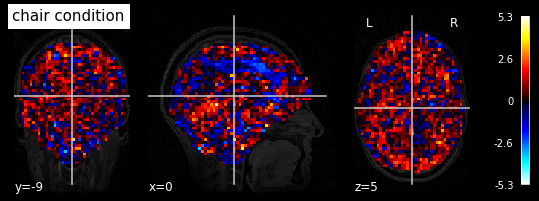

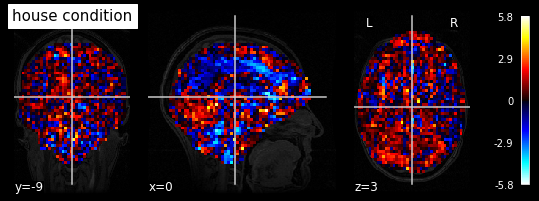

Session:  10


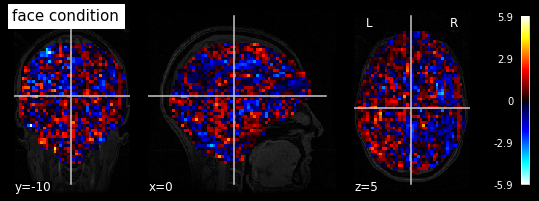

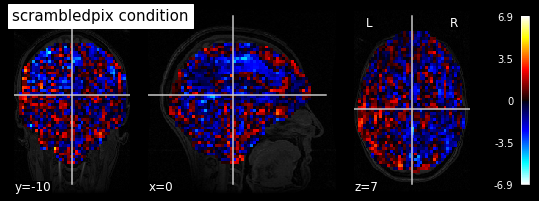

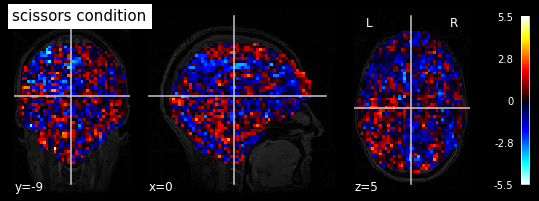

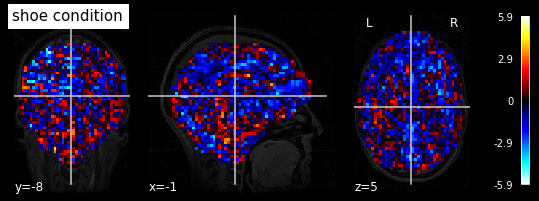

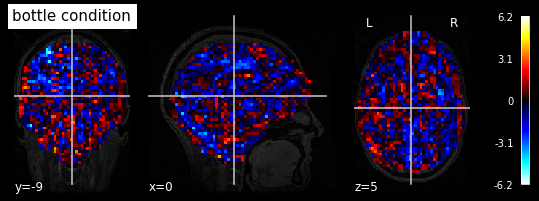

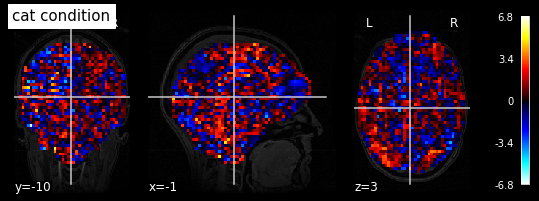

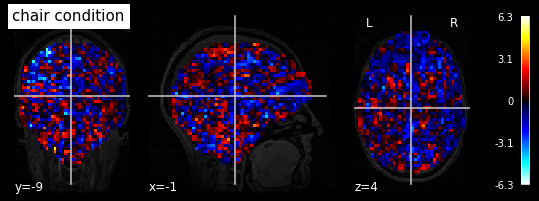

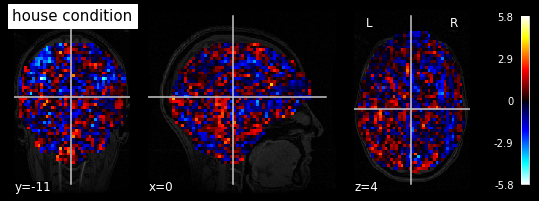

Session:  11


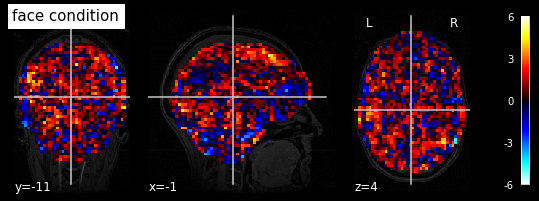

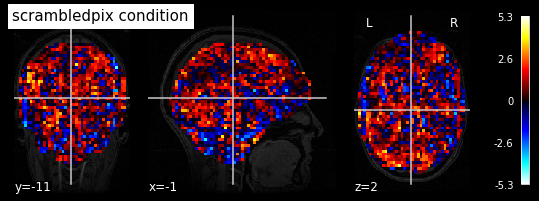

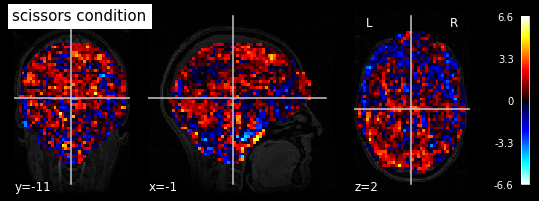

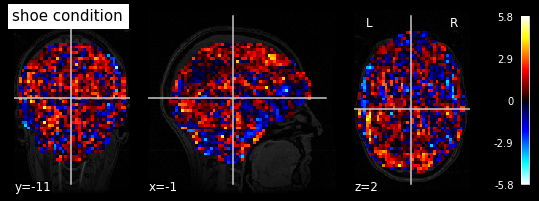

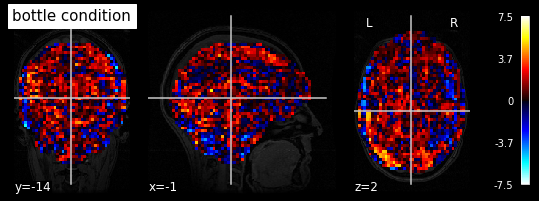

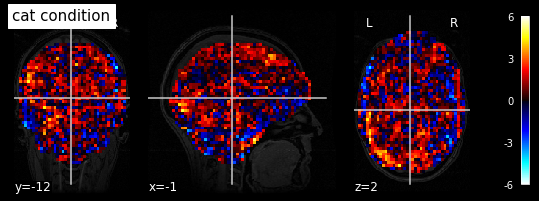

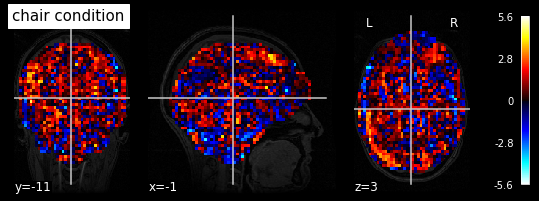

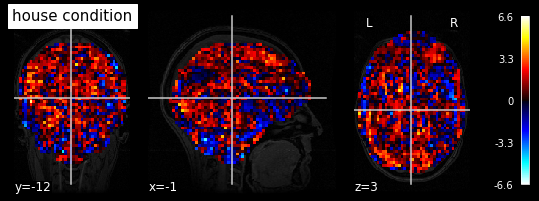

In [41]:
z_maps = []
conditions_label = []
each_session_label = []

for session in range(12):
    print("Session: ", session)
    conditions_session = conditions[sessions == session]
    n_scans = len(conditions_session)

    frame_times = t_r * np.arange(n_scans)
    duration = t_r * np.ones(n_scans)

    events = pd.DataFrame(
    {'onset': frame_times,
    'trial_type': conditions_session,
    'duration': duration})

    glm = FirstLevelModel(t_r=t_r, mask_img=haxby_dataset.mask, high_pass=0.008, smoothing_fwhm=4.)
    fmri_session = image.index_img(functional, sessions == session)
    glm.fit(fmri_session, events=events)

    for condition_ in conditions_names:
        z_maps.append(glm.compute_contrast(condition_))
        conditions_label.append(condition_)
        each_session_label.append(session)
        plotting.plot_stat_map(glm.compute_contrast(condition_), bg_img=haxby_dataset['anat'][0], title=condition_ + ' condition')
        plotting.show()

Getting 96 contrast maps as shown above

## Decoding: Classifying conditions given brain responses

In [42]:
from nilearn.decoding import Decoder
from sklearn.model_selection import LeaveOneGroupOut

decoder = Decoder(estimator='svc', mask=haxby_dataset.mask, standardize=False, screening_percentile=5, cv=LeaveOneGroupOut())
decoder.fit(z_maps, conditions_label, groups=each_session_label)

In [43]:
classification_accuracy = np.mean(list(decoder.cv_scores_.values()))
print(classification_accuracy)

0.7172619047619048


In [44]:
decoder_2 = Decoder(estimator='ridge' , mask=haxby_dataset.mask, standardize=False, screening_percentile=5, cv=LeaveOneGroupOut())
decoder_2.fit(z_maps, conditions_label, groups=each_session_label)

classification_accuracy_2 = np.mean(list(decoder_2.cv_scores_.values()))
print(classification_accuracy_2)

0.7604166666666666


### Q15. Tell us what this example tried to replicate in the paper. Does the classification accuracies per ROI across different categories makes sense with the outcomes of the paper? Convince us by writing a brief paragraph to assess your understanding.

The above tries to repliate the results of the Haxby experiment by comparing the accuracies of various ROI masks and achieves the accuracies of comparable scale.

Moreover, it even finds a 100% accuracy in classification for mask_vt like the original Haxby paper. Apart from this, even the comparison between maks_face, mask_house and mask_vt is also similar to that achieved in the original Haxby paper.